In [1]:
!pwd

/Users/gbort/Applications/kaggle/integer-sequence-learning


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [5]:
def split(seq):
    return seq.split(",")

train["SequenceList"] = train["Sequence"].apply(split)
test["SequenceList"] = test["Sequence"].apply(split)

In [6]:
train.head()

,Id,Sequence,SequenceList
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352...","[1, 3, 13, 87, 1053, 28576, 2141733, 508147108..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...","[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...","[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099...","[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787...","[1, 111, 12211, 1343211, 147753211, 1625285321..."


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

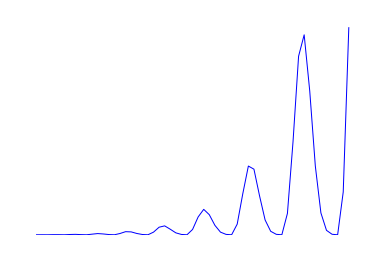

In [8]:
y = train.SequenceList[1]
x = range(len(y))
plt.axis('off')
plt.plot(x, y)

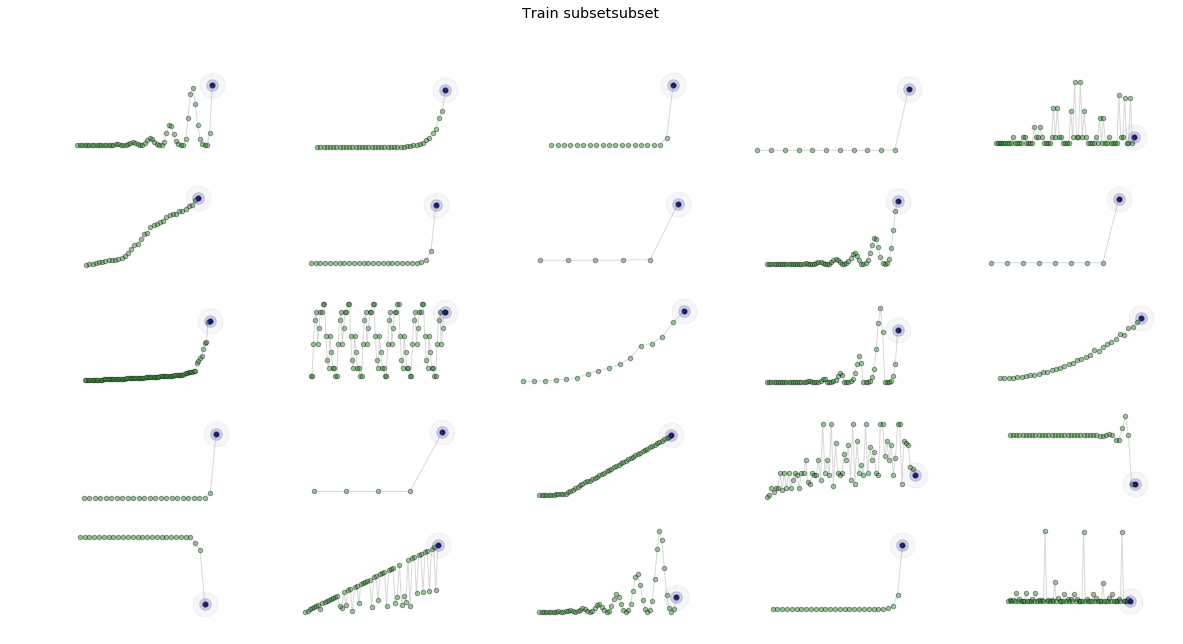

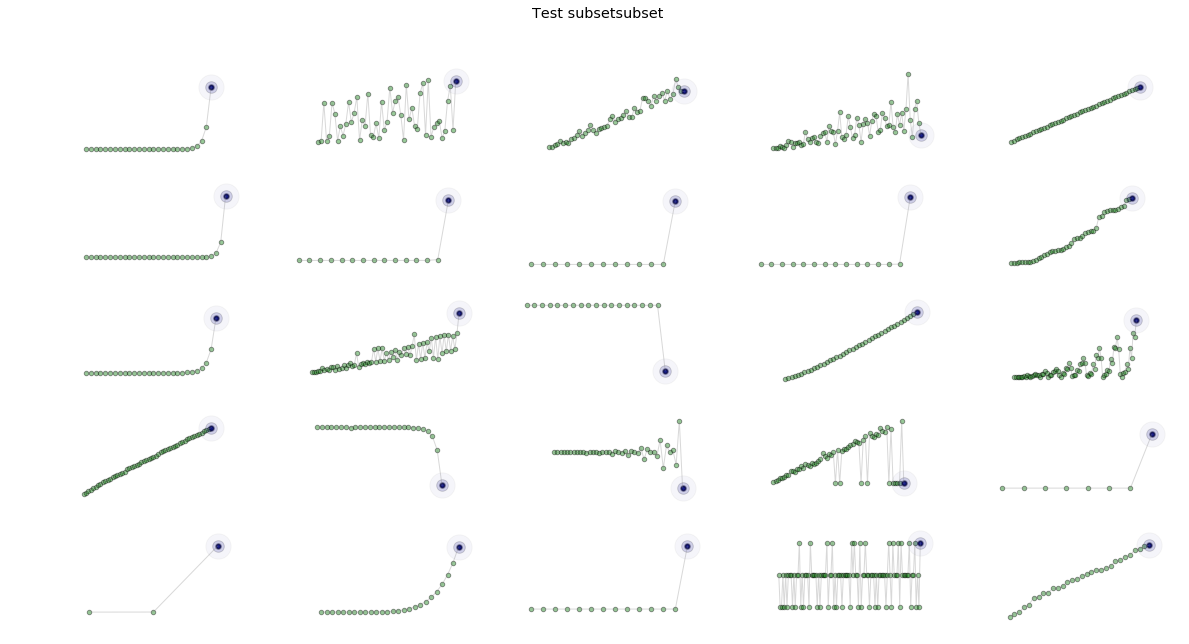

In [13]:
def plotSubset(set, subsetName):
    plt.figure(figsize=(20,10))
    plt.suptitle(subsetName + "subset", fontsize="x-large")
    for k in range(25):
        y = set['SequenceList'][1+k]
        x = np.linspace(1, len(y),len(y))
        plt.subplot(5,5,1+k)
        # plot the points
        plt.scatter(x, y, s=20, c='green', alpha=0.4)
        # shows the expected output
        for j in range(5):
            plt.scatter(x[-1], y[-1], s=10+5**j, c='darkblue', alpha=0.52-0.12*j)
        plt.plot(x, y, c='gray', alpha=0.3)
        plt.axis('off')
    plt.savefig('e01.png')
    
plotSubset(train, "Train subset")
plotSubset(test, "Test subset")

In [98]:
from sklearn.linear_model import LinearRegression

def addPolynomialTerms(subX, x):
    subX['x2'] = x**2
    subX['x3'] = x**3
    subX['x4'] = x**.5
    subX['x5'] = np.sin(x)
    subX['x6'] = np.cos(x)
    subX['x7'] = np.exp(x)
    subX['x8'] = np.log(x)

y         = train['SequenceList'][2]
x         = np.linspace(1, len(y), len(y))
regresor  = LinearRegression()
subX      = pd.DataFrame({'x':x})
addPolynomialTerms(subX, x)
regresor.fit(subX.as_matrix(), y)
predict   = regresor.predict(subX.as_matrix())
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=20, c='green', alpha=0.4)
for j in range(5):
    plt.scatter(x[-1], y[-1], s=50+5**j, c='darkblue', alpha=0.52-0.12*j)
    plt.scatter(x[-1], predict[-1], s=50+5**j, c='red', alpha=0.52-0.12*j)
plt.plot(x, y, c='black', alpha=0.6, label='expected output')
plt.plot(x, predict, c='red', alpha=0.8, linewidth=1., label='real output')
plt.legend(loc='upper left')
plt.savefig('linear03.png')

TypeError: cannot perform reduce with flexible type

# Train set

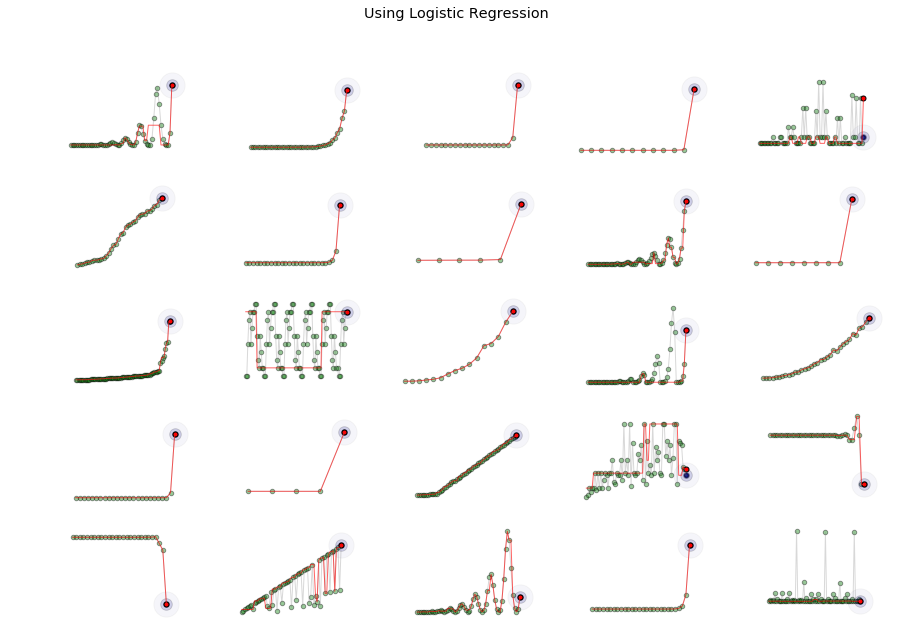

In [11]:
regresor  = LogisticRegression()

plt.figure(figsize=(15,10))
plt.suptitle("Using Logistic Regression", fontsize="x-large")
for k in range(25):
    y = train['SequenceList'][k+1]
    x = np.linspace(1, len(y),len(y))
    subX = pd.DataFrame({'x':x})
    addPolynomialTerms(subX, x)
    plt.subplot(5,5,1+k)
    # regresor
    regresor.fit(subX.as_matrix(), y)
    predict   = regresor.predict(subX.as_matrix())
    # plot the points
    plt.scatter(x, y, s=20, c='green', alpha=0.4)
    # shows the expected and real output
    for j in range(5):
        plt.scatter(x[-1], y[-1], s=10+5**j, c='darkblue', alpha=0.52-0.12*j)
    plt.scatter(x[-1], predict[-1], s=25, c='red')
    plt.plot(x, y, c='gray', alpha=0.3)
    plt.plot(x, predict, c='red', alpha=0.6, linewidth=1.)
    plt.axis('off')
plt.savefig('e02.png')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


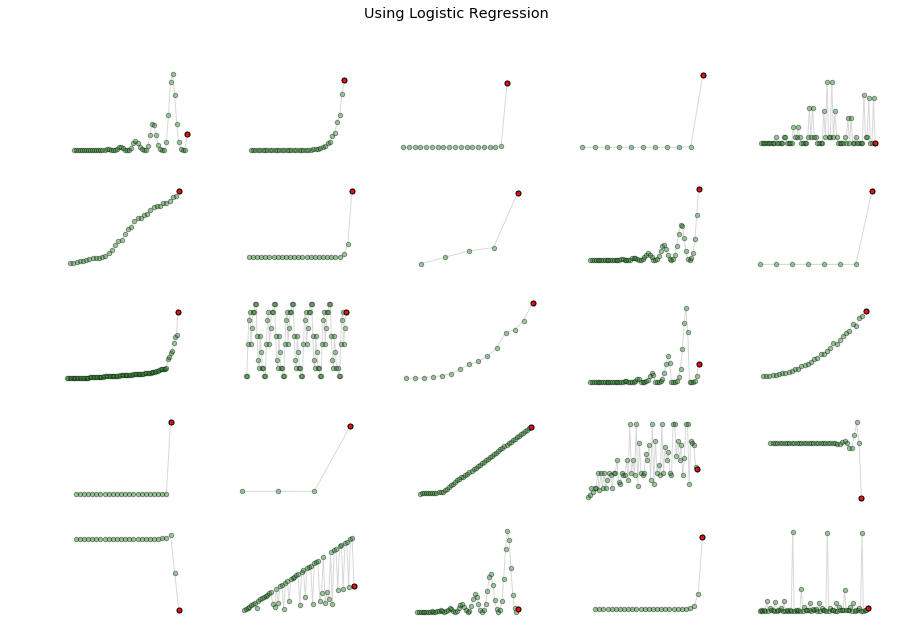

In [76]:
regresor  = LogisticRegression()

plt.figure(figsize=(15,10))
plt.suptitle("Using Logistic Regression", fontsize="x-large")
for k in range(25):
    sequence = train['SequenceList'][k+1]
    y = sequence[:-1]
    x = np.linspace(1, len(y), len(y))
    subX = pd.DataFrame({'x':x})
    addPolynomialTerms(subX, x)
    plt.subplot(5,5,1+k)
    # regresor
    regresor.fit(subX.as_matrix(), y)
    
    # last prediction
    lastX2 = np.linspace(len(y), len(y)+1, 1)
    subX2 = pd.DataFrame({'x': lastX2})
    addPolynomialTerms(subX2, lastX2)
    predict   = regresor.predict(subX2.as_matrix())
    print(y[-1:][0] == predict[0])
    
    # plot the points
    plt.scatter(x, y, s=20, c='green', alpha=0.4)
    
    # shows the expected and real output
    #for j in range(5):
    #    plt.scatter(x[-1], y[-1], s=10+5**j, c='darkblue', alpha=0.52-0.12*j)
    plt.scatter(lastX2, predict, s=25, c='red')
    plt.plot(x, y, c='gray', alpha=0.3)
    #plt.plot(x, predict, c='red', alpha=0.6, linewidth=1.)
    plt.axis('off')
plt.savefig('e02.png')